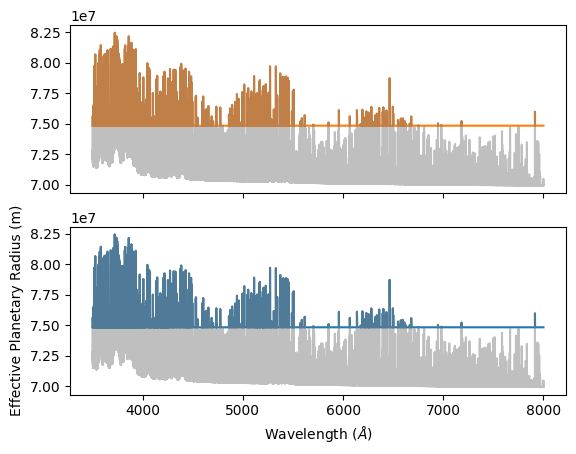

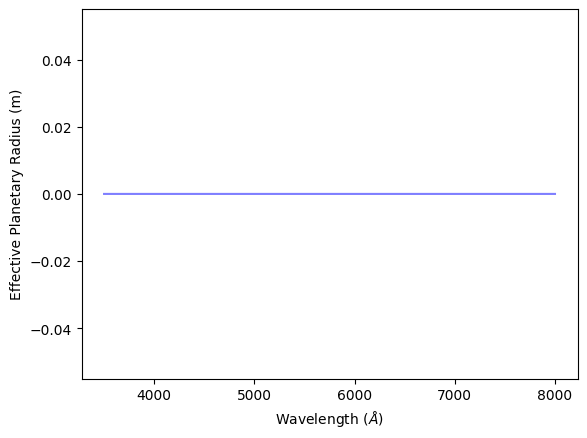

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

wl, sigma = np.load("/home/danny/exoplanet_atmospheres/notebooks/x_FeI_2500K_m2.npy")
chi_FeI = 1e-6

p_cloud = 0.01 * 1e5 #Pa
T = 3000 #K
P_0 = 10 * 1e5 #Pa

#Planet parameters
Rpl = const.R_jup.value
Mpl = 0.9 * const.M_jup.value
g = const.G.value * Mpl/(Rpl)**2
mmw = 2.3 * const.m_p.value

Hs = const.k_B.value * T/(mmw * g)

R_0 = Rpl 
gamma = 0.54

constant_beer = R_0 + Hs * (gamma + np.log(P_0 / g) - np.log(mmw) + 0.5*np.log(2.*np.pi*R_0/Hs) )



r_fe_beer = constant_beer + Hs * np.log(chi_FeI * sigma)

r_continuum_cloud = R_0 + Hs * np.log(P_0/p_cloud)

r_continuum_raleigh = 2.3e-31 * (43/wl)**4

# r_continuum_raleigh = 0

r_continuum = np.maximum(r_continuum_cloud, r_continuum_raleigh)

r = np.maximum(r_continuum, r_fe_beer)

r_no_raleigh = np.maximum(r_continuum_cloud, r_fe_beer)

fig, ax = plt.subplots(2, sharex= 'all')
ax[0].plot(wl, r, 'C1')
ax[0].plot(wl, r_fe_beer, '0.5', alpha = 0.5)
ax[1].set_xlabel(r'Wavelength $(\AA)$')
# ax[0].set_ylabel(r'Effective Planetary Radius (m)')
ax[1].plot(wl, r_no_raleigh, 'C0')
ax[1].plot(wl, r_fe_beer, '0.5', alpha = 0.5)
plt.ylabel('Effective Planetary Radius (m)')

fig, ax = plt.subplots(1, sharex= 'all')
ax.set_xlabel(r'Wavelength $(\AA)$')
ax.set_ylabel(r'Effective Planetary Radius (m)')
ax.plot(wl, r_no_raleigh - r, 'blue', alpha = 0.5)

# print(const.R_jup.value/const.R_sun.value)

Loading Radtrans opacities...
 Loading line opacities of species 'Fe' from file '/home/danny/petitRADTRANS/input_data/opacities/lines/correlated_k/Fe/56Fe/56Fe__Kurucz.R1000_0.1-250mu.ktable.petitRADTRANS.h5'... Done.
 Successfully loaded all line opacities
 Loading CIA opacities for H2--He from file '/home/danny/petitRADTRANS/input_data/opacities/continuum/collision_induced_absorptions/H2--He/H2--He-NatAbund/H2--He-NatAbund__BoRi.DeltaWavenumber2_0.5-500mu.ciatable.petitRADTRANS.h5'... Done.
 Successfully loaded all CIA opacities
Successfully loaded all opacities


/tmp/ipykernel_5959/3786002568.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x*1e4:.0f}' for x in xticks])


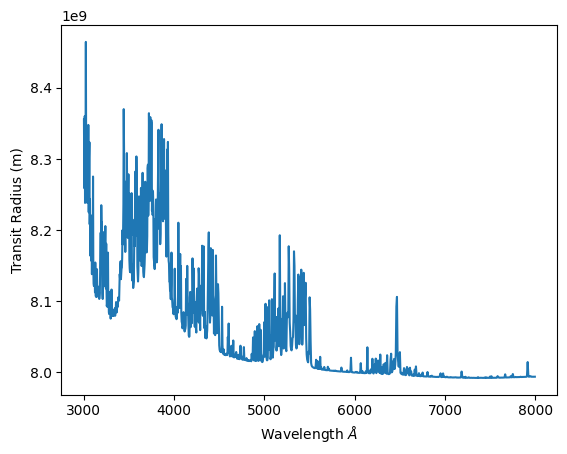

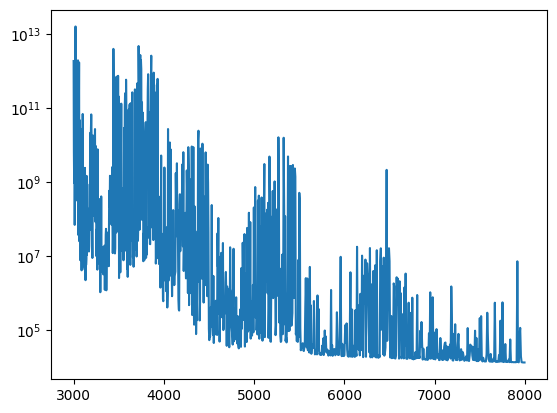

In [25]:
from petitRADTRANS.radtrans import Radtrans
from petitRADTRANS.plotlib import plot_radtrans_opacities
from petitRADTRANS import physical_constants as cst
from petitRADTRANS.config import petitradtrans_config_parser
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sp

cgs_to_SI = (1/(4*np.pi*sp.epsilon_0))

radtrans = Radtrans(
    pressures=np.logspace(-6, 2, 100),
    line_species=[
    "Fe"
    ],
    #rayleigh_species=['H2', 'He'],
    gas_continuum_contributors=['H2--He'],
    wavelength_boundaries=[0.3, 0.8]
)

temperatures = 2500 * np.ones_like(radtrans.pressures)
chi_FeI ={'Fe': 1e-6 * np.ones_like(temperatures),
          'H2': 0.74 * np.ones_like(temperatures),
          'He': 0.24 * np.ones_like(temperatures)} 
mean_molecular_weight = 2.3 * np.ones_like(temperatures)

planet_radius = 1.2 * cst.r_jup_mean
planet_mass = 0.8 * cst.m_jup
grav = cst.G * planet_mass / (planet_radius)**2
refpressure = 0.01

wavelengths, transit_radii, _ = radtrans.calculate_transit_radii(
    temperatures = temperatures,
    mass_fractions = chi_FeI,
    mean_molar_masses = mean_molecular_weight,
    reference_gravity = grav,
    planet_radius = planet_radius,
    reference_pressure = refpressure
)

fig, ax = plt.subplots()

ax.plot(wavelengths * 1e8, transit_radii)
# ax[0].set_xscale('log')
ax.set_xlabel(r'Wavelength $\AA$')
ax.set_ylabel('Transit Radius (m)')

# ax[1].plot(wavelengths, transit_radii)
# ax[0].set_xscale('log')

fe_mass_frac = {
    'Fe': 1e6
}

fig, ax = plt.subplots()
plot_radtrans_opacities(
    radtrans,
    radtrans.line_species,
    temperature=2500,
    pressure_bar= 0.01,
    mass_fractions = fe_mass_frac
)
ax.set_yscale('log')

xticks = ax.get_xticks()

ax.set_xticklabels([f'{x*1e4:.0f}' for x in xticks])

yticks = ax.get_yticks()

# ax.set_yticklabels([f'{y*cgs_to_SI:.1g}' for y in yticks])

Loading Radtrans opacities...
 Loading line opacities of species 'Fe' from file '/home/danny/petitRADTRANS/input_data/opacities/lines/correlated_k/Fe/56Fe/56Fe__Kurucz.R1000_0.1-250mu.ktable.petitRADTRANS.h5'... Done.
 Successfully loaded all line opacities
 Loading CIA opacities for H2--He from file '/home/danny/petitRADTRANS/input_data/opacities/continuum/collision_induced_absorptions/H2--He/H2--He-NatAbund/H2--He-NatAbund__BoRi.DeltaWavenumber2_0.5-500mu.ciatable.petitRADTRANS.h5'... Done.
 Successfully loaded all CIA opacities
Successfully loaded all opacities


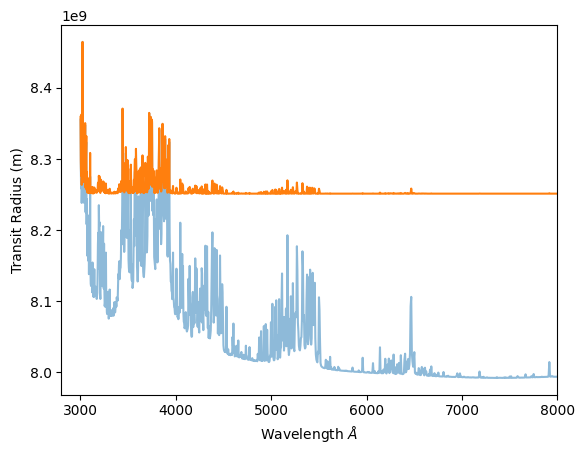

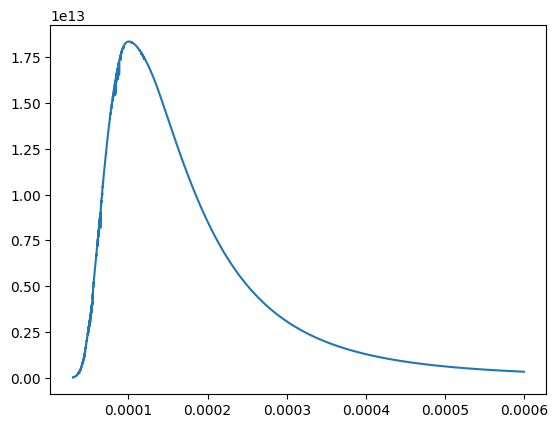

In [6]:
from petitRADTRANS.radtrans import Radtrans
from petitRADTRANS.plotlib import plot_radtrans_opacities
from petitRADTRANS import physical_constants as cst
from petitRADTRANS.config import petitradtrans_config_parser
from petitRADTRANS.physics import temperature_profile_function_guillot_global
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sp

cgs_to_SI = (1/(4*np.pi*sp.epsilon_0))

radtrans = Radtrans(
    pressures=np.logspace(-6, 2, 100),
    line_species=[
    "Fe"
    ],
    #rayleigh_species=['H2', 'He'],
    gas_continuum_contributors=['H2--He'],
    # cloud_species = ['Fe(s)_crystalline__DHS'],
    wavelength_boundaries=[0.3, 6],
    scattering_in_emission = True
)

temperatures = 2500 * np.ones_like(radtrans.pressures)
mass_ratios ={'Fe': 1e-6 * np.ones_like(temperatures),
          'H2': 0.74 * np.ones_like(temperatures),
          'He': 0.24 * np.ones_like(temperatures)} 
mean_molecular_weight = 2.3 * np.ones_like(temperatures)

planet_radius = 1.2 * cst.r_jup_mean
planet_mass = 0.8 * cst.m_jup

star_radius =  0.8 * cst.r_sun
star_mass = 2 * cst.m_sun

grav = cst.G * planet_mass / (planet_radius)**2
refpressure = 0.01


# cloud_fsed = {'Fe(s)_crystalline__DHS': 2}

wavelengths_clouds, transit_radii_clouds, _ = radtrans.calculate_transit_radii(
    temperatures = temperatures,
    mass_fractions = mass_ratios,
    mean_molar_masses = mean_molecular_weight,
    reference_gravity = grav,
    planet_radius = planet_radius,
    opaque_cloud_top_pressure= 0.1,
    reference_pressure = refpressure
)

wavelengths, transit_radii, _ = radtrans.calculate_transit_radii(
    temperatures = temperatures,
    mass_fractions = mass_ratios,
    mean_molar_masses = mean_molecular_weight,
    reference_gravity = grav,
    planet_radius = planet_radius,
    reference_pressure = refpressure
)

infrared_mean_opacity = 0.1
gamma = 0.54

temperature_gradient = temperature_profile_function_guillot_global(
    pressures=radtrans.pressures * 1e-6,
    infrared_mean_opacity=infrared_mean_opacity,
    gamma=gamma,
    gravities=grav,
    intrinsic_temperature= 200,
    equilibrium_temperature=temperatures[0]
)

wl, flux, _ = radtrans.calculate_flux(
    temperatures = temperature_gradient,
    mass_fractions = mass_ratios,
    mean_molar_masses = mean_molecular_weight,
    reference_gravity = grav
)


fig, ax = plt.subplots()

ax.plot(wavelengths * 1e8, transit_radii, alpha = 0.5)

# fig, ax = plt.subplots()
ax.plot(wavelengths_clouds * 1e8, transit_radii_clouds)
ax.set_xlim(2800, 8000)
# ax[0].set_xscale('log')
ax.set_xlabel(r'Wavelength $\AA$')
ax.set_ylabel('Transit Radius (m)')

fig, ax = plt.subplots()
ax.plot(wl, flux)


Text(0, 0.5, 'Flux (Broadened)')

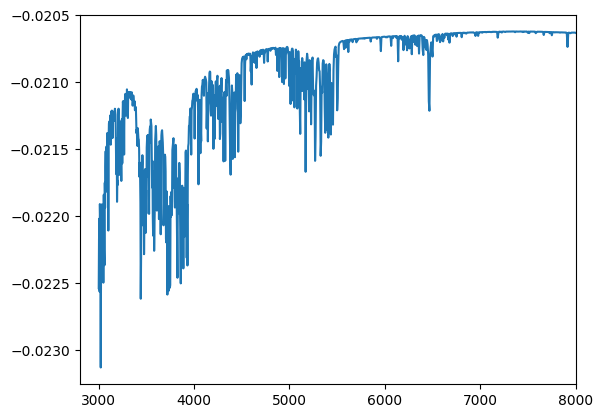

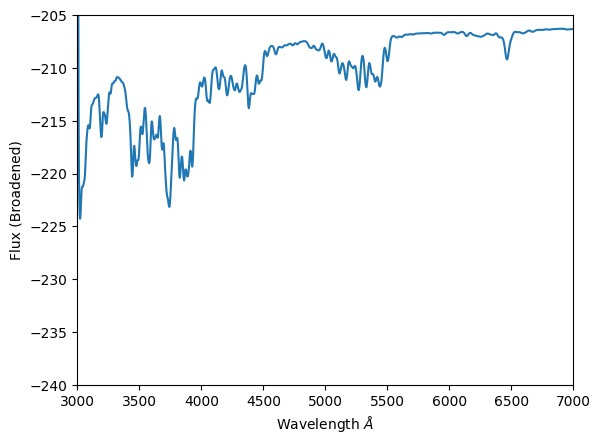

In [14]:
rprs = transit_radii/star_radius
rprs_clouds = transit_radii_clouds/star_radius

dflux = - rprs**2
dflux_clouds = -rprs**2

f, ax = plt.subplots(1)
ax.plot(wavelengths * 1e8, dflux)
ax.set_xlim(2800, 8000)

sigma = 2
gaussian = np.exp(-0.5 * np.linspace(-50, 50 ,101)**2/ sigma**2)
gaussian /= gaussian.sum()

dflux_broadened = np.convolve(gaussian, dflux, 'same')

f, ax = plt.subplots()
ax.plot(wavelengths * 1e8, dflux_broadened * 10000)
ax.set_xlim(2999, 7000)
ax.set_ylim(-240, -205)
ax.set_xlabel(r'Wavelength $\AA$')
ax.set_ylabel('Flux (Broadened)')